In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from matplotlib import cm
import fileinput
import multiprocessing 
import time
import random
from astropy.table import Table
from chainconsumer import ChainConsumer
from pathlib import Path
import math
from tqdm import tqdm
import healpy as hp
import treecorr

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

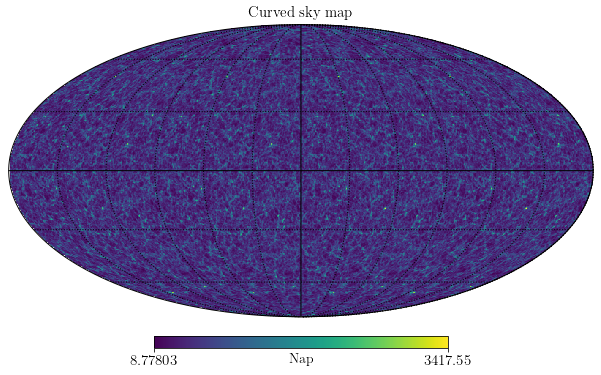

In [3]:
nside=2**12
Nap=np.load('data/Nap_tophat20_nside'+str(nside)+'.npy')
hp.mollview(Nap,
            title="Curved sky map",
            unit="Nap",
            # norm="hist",
            nest=False ## True would be Ring
)

hp.graticule()

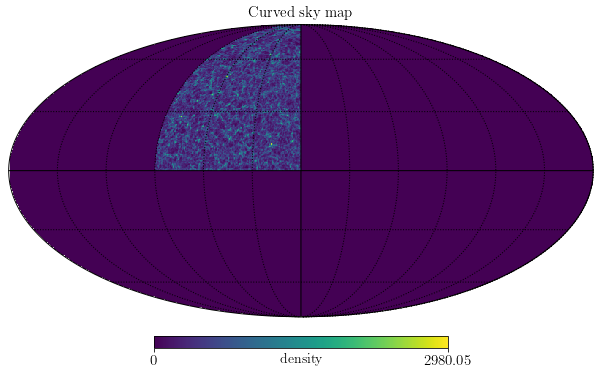

In [4]:
pix=np.load('data/pix_nside'+str(nside)+'.npy')
npix = hp.nside2npix(nside=nside)
Nap_octant = np.zeros(npix)
Nap_octant[pix]=Nap[pix]
hp.mollview(Nap_octant,
            title="Curved sky map",
            unit="density",
            # norm="hist",
            nest=False ## True would be Ring
)

hp.graticule()

In [6]:
Nap=np.load('data/Nap_tophat20_nside'+str(nside)+'.npy')
pix=np.load('data/pix_nside'+str(nside)+'.npy')
Nap_octant=Nap[pix][0]

Nap_pred = Table.read('data/pred/pofNap_tophat_best.fits')
Nap_pred

Nap_values,pofNap
float64,float64
0.0,1.9415868141490185e-06
2.0,1.7413668042242973e-06
4.0,2.382089588130402e-06
6.0,2.8815312158726063e-06
8.0,3.451826982667499e-06
10.0,4.110792155024722e-06
12.0,4.862716456088242e-06
14.0,5.717118026159162e-06
16.0,6.682778053095851e-06


In [11]:
Nap_octant.mean()/(20**2*np.pi),Nap_octant.mean()

(0.4078594599235763, 512.5313131972032)

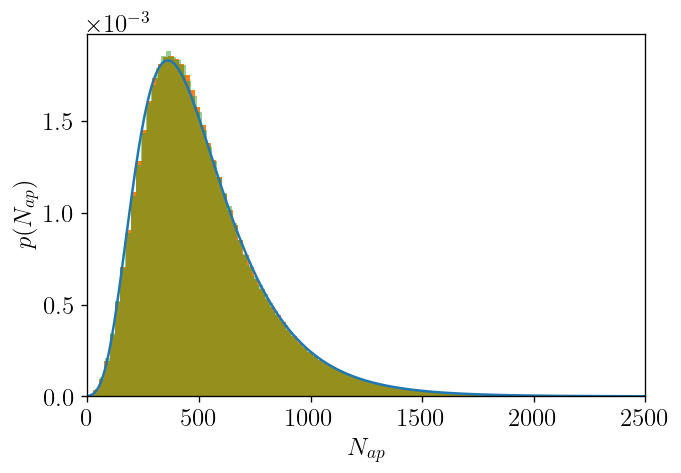

In [26]:
fig, axes = plt.subplots(figsize=(6,4),dpi=120)
plt.plot(Nap_pred['Nap_values'],Nap_pred['pofNap'])
plt.hist(Nap,bins=150,density=True)
plt.hist(Nap_octant,bins=150,density=True,alpha=0.5)
plt.xlim(0,2500)
#plt.yscale('log')
plt.ylabel(r"$p(N_{ap})$")
plt.xlabel(r"$N_{ap}$")
axes.ticklabel_format(style='sci',axis='y',scilimits=(0,0),useMathText=True)
plt.show()

In [8]:
shear_pred = Table.read('data/pred/shear_tophat_best.fits')
shear_pred

r_arcmin,"g_t,1_sbin4","g_t,2_sbin4","g_t,3_sbin4","g_t,4_sbin4","g_t,5_sbin4"
float64,float64,float64,float64,float64,float64
0.43351467638966573,-2.4594309004730835e-07,-1.6827166267080907e-07,-8.206291946655621e-08,4.818270959159373e-08,4.481116865446763e-07
0.5027529024918027,-2.4325604667217726e-07,-1.7411112768759337e-07,-9.064506442630705e-08,4.106882350060452e-08,4.669583435761189e-07
0.5830494207691783,-2.421925606921251e-07,-1.8343028943554676e-07,-1.0269313830411127e-07,3.2241145159791866e-08,4.960875884967887e-07
0.6761703918055793,-2.44979933519034e-07,-1.983880646271724e-07,-1.197339636589776e-07,2.1591840062965863e-08,5.41520314191208e-07
0.7841640561984402,-2.5566032607507276e-07,-2.2249600429191836e-07,-1.4403658885964524e-07,9.27401879515519e-09,6.129262883629479e-07
0.9094057865970543,-2.8081917526588673e-07,-2.611456026311784e-07,-1.7889083534292213e-07,-4.179927549810385e-09,7.250401339335341e-07
1.054650335167775,-3.305382088552959e-07,-3.2231465492394383e-07,-2.2899194397477986e-07,-1.77174041070911e-08,8.995644769833368e-07
1.223092425694383,-4.1856757161825263e-07,-4.1688309873198943e-07,-3.0074182099108955e-07,-2.990035250009749e-08,1.166093872014256e-06
1.4184370230660308,-5.606095261751192e-07,-5.579416046101347e-07,-4.0227115970941935e-07,-3.9653045431984734e-08,1.5604767889345651e-06


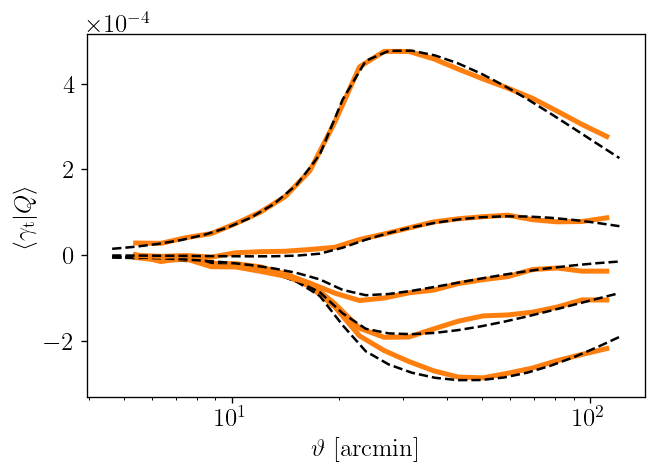

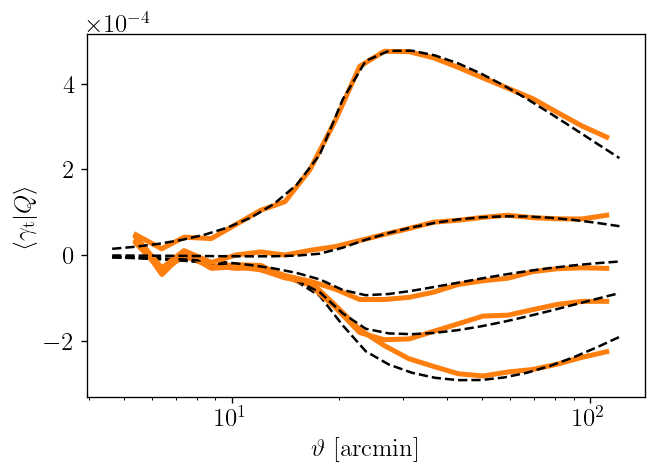

In [25]:
fig, axes = plt.subplots(figsize=(6,4),dpi=120)
for i in range(5):
    shear_data = np.loadtxt('data/shear/shear_quant'+str(i+1)+'_tophat_nside4096.dat')
    plt.plot(shear_data[:,1],shear_data[:,3],c='C1',linewidth=3)

    plt.plot(shear_pred['r_arcmin'][16:39],shear_pred['g_t,'+str(i+1)+'_sbin4'][16:39],c='black',linestyle='--')
plt.xscale('log')
axes.ticklabel_format(style='sci',axis='y',scilimits=(0,0),useMathText=True)
plt.ylabel(r"$\langle \gamma_\mathrm{t} | Q \rangle$")
plt.xlabel(r"$\vartheta$ [arcmin]")
plt.show()


fig, axes = plt.subplots(figsize=(6,4),dpi=120)
for i in range(5):
    shear_data = np.loadtxt('data/shear/shear_quant'+str(i+1)+'_tophat_nside2048.dat')
    plt.plot(shear_data[:,1],shear_data[:,3],c='C1',linewidth=3)

    plt.plot(shear_pred['r_arcmin'][16:39],shear_pred['g_t,'+str(i+1)+'_sbin4'][16:39],c='black',linestyle='--')
plt.xscale('log')
axes.ticklabel_format(style='sci',axis='y',scilimits=(0,0),useMathText=True)
plt.ylabel(r"$\langle \gamma_\mathrm{t} | Q \rangle$")
plt.xlabel(r"$\vartheta$ [arcmin]")
plt.show()